# Simulación de la conversión de una señal analógica a digital:

### Recordemos que si queremos digitalizar una señal analógica (por definición, continua en cada instante de tiempo dentro de un intervalo temporal en el que se hace la medición), esta tiene que pasar por un sistema de procesamiento, esquematizado a continuación:

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import style

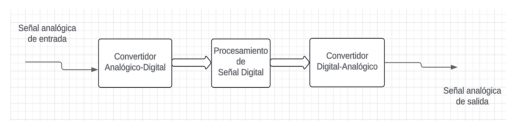

In [2]:
imagen = Image.open('esquema.png')
imagen_escalada = imagen.resize((4000, 900))
plt.imshow(imagen_escalada)
plt.axis('off')  
plt.show()

### Dentro del procesamiento de señales, para poder manipular una señal (extraer información de ella, suavizarla etc.), normalmente se hace uso de un sistema de cómputo.

### Para que un sistema de cómputo pueda procesar una señal, esta debe de ser digital, por ello cuando tenemos una señal analógica que queremos estudiar, convertimos esta señal de entrada a una descripción digital mediante un convertidor A-D. Ya con la señal digitalizada, con ayuda del equipo de cómputo se realiza el procesamiento de la señal, la cual al quererla de salida análoga nuevamente, debe de pasar por un convertidor D-A.


# Este notebook tiene como objetivo visualizar el proceso particular  de la conversión Analógica-Digital dentro de un sistema de procesamiento de señales.

### Un convertidor A-D consiste de 3 componentes (o bloques): Muestreador (Sampler), Cuantizador (Quantizer) y Codificador (Coder).

(Esquema)

### Teniendo una señal analógica de entrada $x(t)$, lo que le hace el muestreador es que la vuelve una señal discreta en el tiempo, es decir, de la forma $x \sim x(n)$. Posteriormente, el cuantizador genera una señal cuantizada a partir de la discreta, es decir, de la forma $x \sim x_i (n)$. Finalmente, dentro de este proceso particular, el codificador transforma a la señal cuantizada en una señal digital, por ejemplo mediante una descripción binaria (la cual depende de los bits asociados al codificador).

# Vamos a trabajar el caso de una señal descrita mediante la función:

# $x(t)=(0.85)^t$

### Definimos una muestra dentro de un intervalo temporal $\tau$. Esta tendrá una frecuencia asociada $\nu_s =1 Hz$ (subíndice s de *sample*) y $\tau$ ha de ser el periodo asociado dado por $\tau=\frac{1}{\nu _s}=1s$. (Las cantidades frecuencia e intervalo temporal de muestra son cantidades muy importantes dentro de una señal analógica).

### Visualizaremos su gráfico. Vamos a darle una apariencia similar a la que tienen normalmente los osciloscopios al mostrar las señales:

In [3]:
t = np.arange(0,11) #Definimos este intervalo temporal.
x = (0.85) ** t

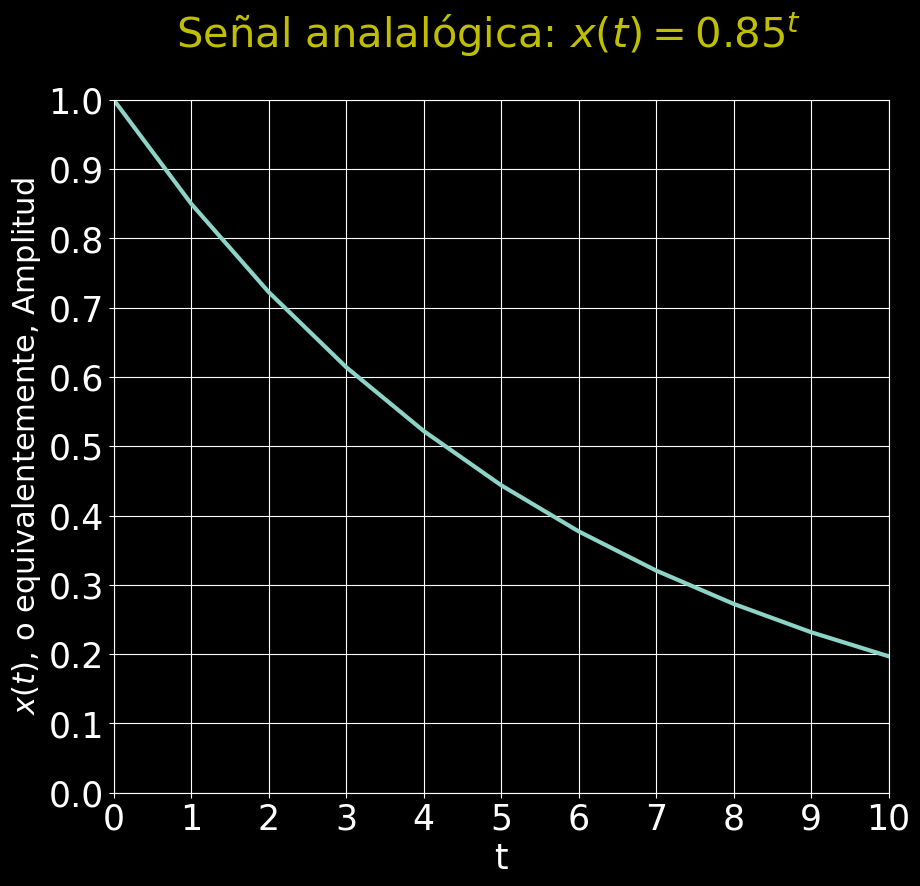

In [20]:
plt.figure(figsize = (10,9)) 
plt.suptitle(r'Señal analalógica: $x(t)=0.85^t$', fontsize = 30,color="y")
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.plot(t,x, linewidth =3)
plt.xlabel('t' , fontsize = 25)
plt.ylabel(r'$x(t)$, o equivalentemente, Amplitud', fontsize = 22)
plt.axis([0,10,0,1]) #Los rangos de las etiquetas impresas son tomadas a convención, más adelante esta convención nos servirá
# para visualizar los procesos apropiadamente.
plt.xticks([0, 1 , 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks([0., 0.1 , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid(True)
plt.show()


# $\blacksquare$ Simulación del sistema *Sampler*:

### Recordando que el muestreador discretiza temporalmente la señal, tenemos que a un tiempo $t$ discretizado mediante la relación $t=n\tau$, es decir, tendremos información de la señal cada $\tau$ segundos. La señal, entonces, se expresa como $x(n\tau)=(0.85)^{n\tau}$, con $\tau =1s$. Por lo que tenemos que la señal después de pasar por el sampler está descrita por la función $x(n)=(0.85)^n$.

### Visualizando este proceso:

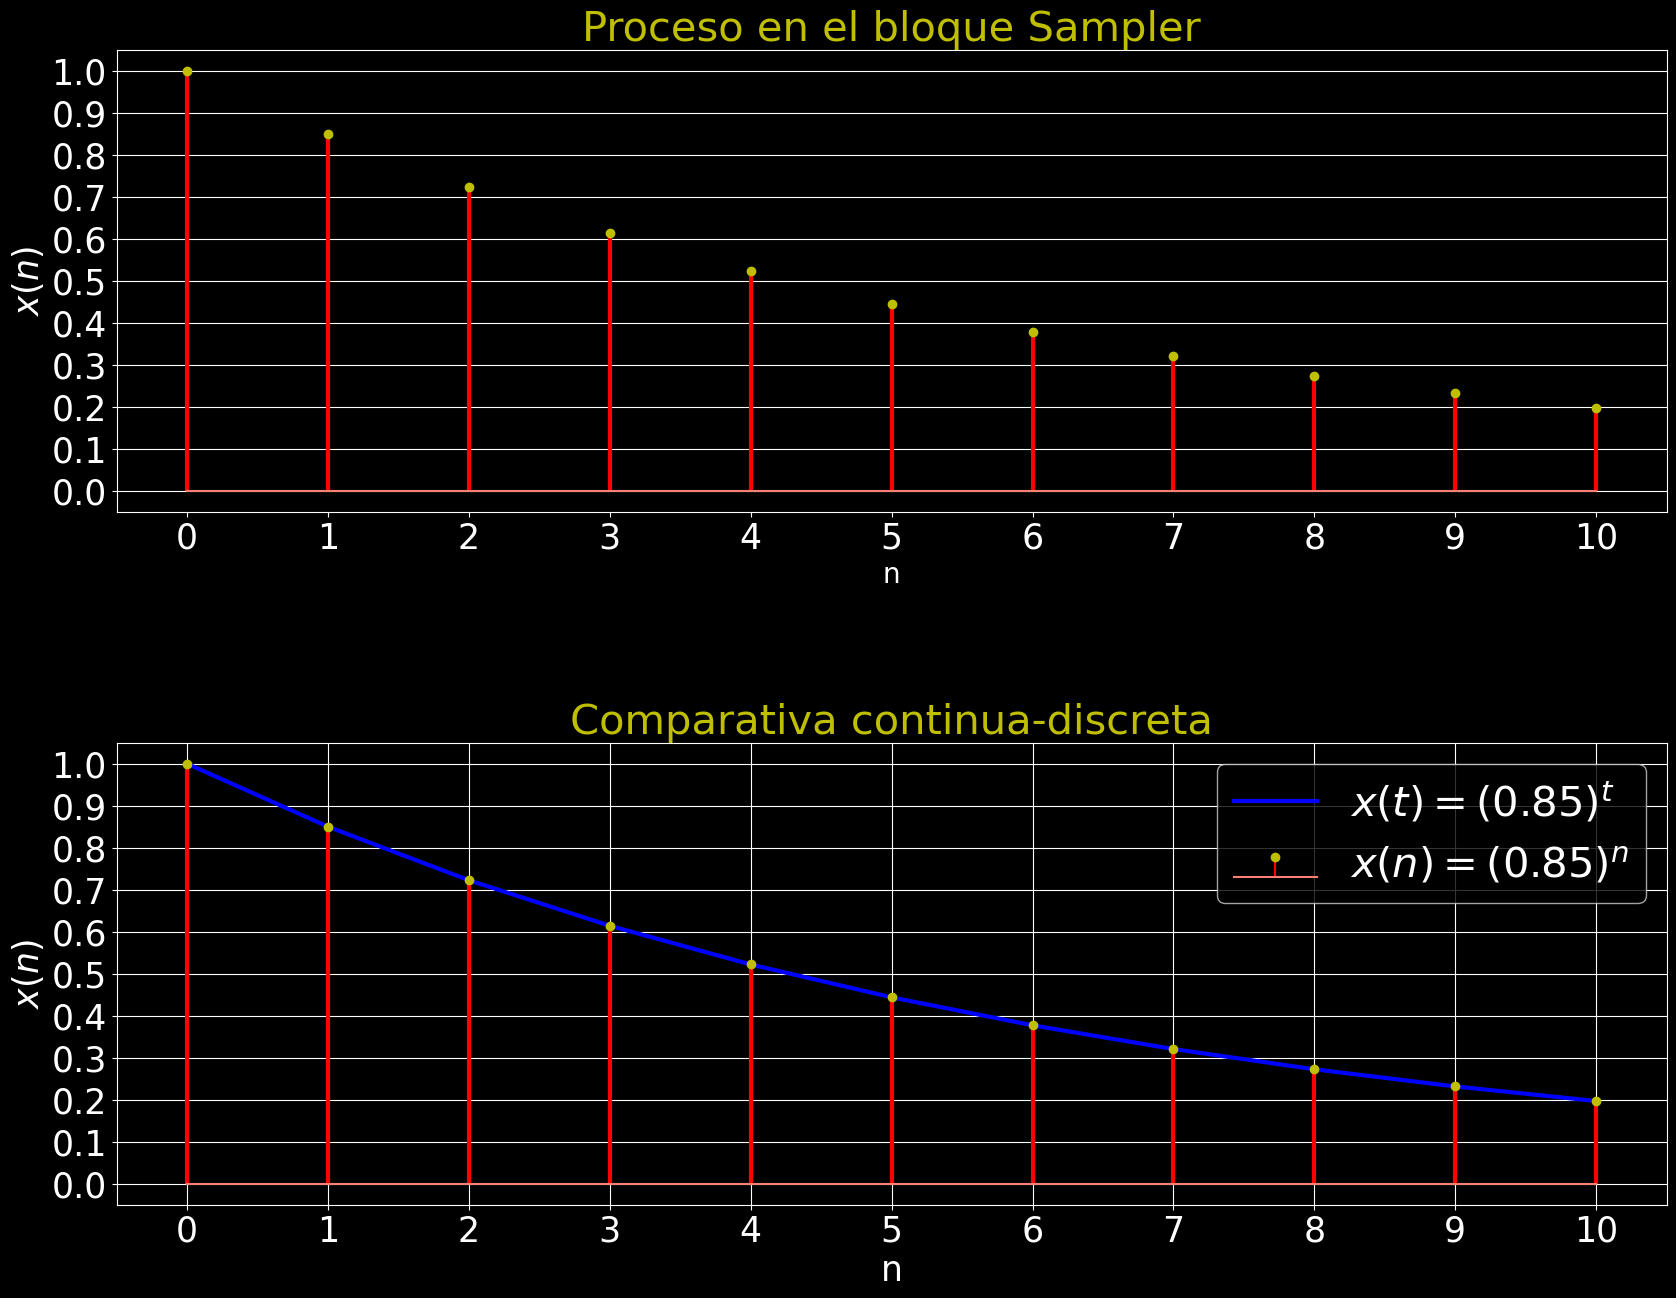

In [11]:
plt.figure(figsize = (20,15))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
n = t

plt.subplot(2,1,1)
markerline, stemlines, baseline = plt.stem(n,x)
plt.setp(markerline, color="y") 
plt.setp(stemlines, 'linewidth', 3, color="r")
plt.xlabel('n' , fontsize = 20)
plt.ylabel(r'$x(n)$', fontsize = 25)
plt.xticks([0, 1 , 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks([0.0, 0.1 , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid(True,axis="y")
plt.title('Proceso en el bloque Sampler', fontsize = 30, color="y")


plt.subplot(2,1,2)
plt.plot(t,x, linewidth =3,label = r'$x(t) = (0.85)^t$',color="b")
plt.xticks([0, 1 , 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks([0.0, 0.1 , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
markerline, stemlines, baseline = plt.stem(n,x,label = r'$x(n) = (0.85)^n$')
plt.setp(markerline, color="y")
plt.setp(stemlines, 'linewidth', 3, color="r")
plt.xlabel('n' , fontsize = 25)
plt.ylabel(r'$x(n)$', fontsize = 25)
plt.legend(fontsize = 30)
plt.xticks([0, 1 , 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks([0.0, 0.1 , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.title('Comparativa continua-discreta', fontsize = 30, color="y")
plt.grid(True)

plt.subplots_adjust(hspace=0.5)
plt.show()

# $\blacksquare$ Simulación del sistema *Quantizer*:

### Este bloque convierte la amplitud de la señal a un formato digital expresando la magnitud de cada muestra como un dígito cuantizado.

### Por ejemplo, cuando $n=1$ tenemos que $0.8 < x(1) < 0.9$, por lo que la cuantización dejaría la magnitud a un dígito u otro, es decir, $x(1)=0.8$ o $x(1)=0.9$. Particularmente, $x(1)=0.85$, por lo que convencionalmente lo cuantizaría a 0.9.

### Otro ejemplo lo tendríamos cuando $n=4$, aquí $0.5<x(4)<0.6$:

In [6]:
magnitud=(0.85) **4
magnitud

0.5220062499999999

### Por lo que convencionalmente se asignaría $x(4)$ al dígito 0.5.

### La diferencia de la cuantización con respecto a la discretización es que en el *Quantizer*, la magnitud $x$ de la señal va de acuerdo a niveles cuantizados de valores de acuerdo a un tiempo discreto, pues a un sistema de procesamiento de señales le será más fácil convertir un dígito cuantizado que uno con muchos decimales (como fue el caso de $x(n=4)$).

### Visualizando estos niveles: 

### Como lo habíamos mencionado, el primer paso que toma el *Quantizer* es ver los rangos de cuantización, el rango en el que se encuentra una magnitud $x(n)$, es decir, $k_1<x(n)<k_2$, para poder cuantizar mediante $x(n)=k_1$, o $x(n)=k_2$. ($k_1$ y $k_2$ son valores en el rango de la función que describe la señal).

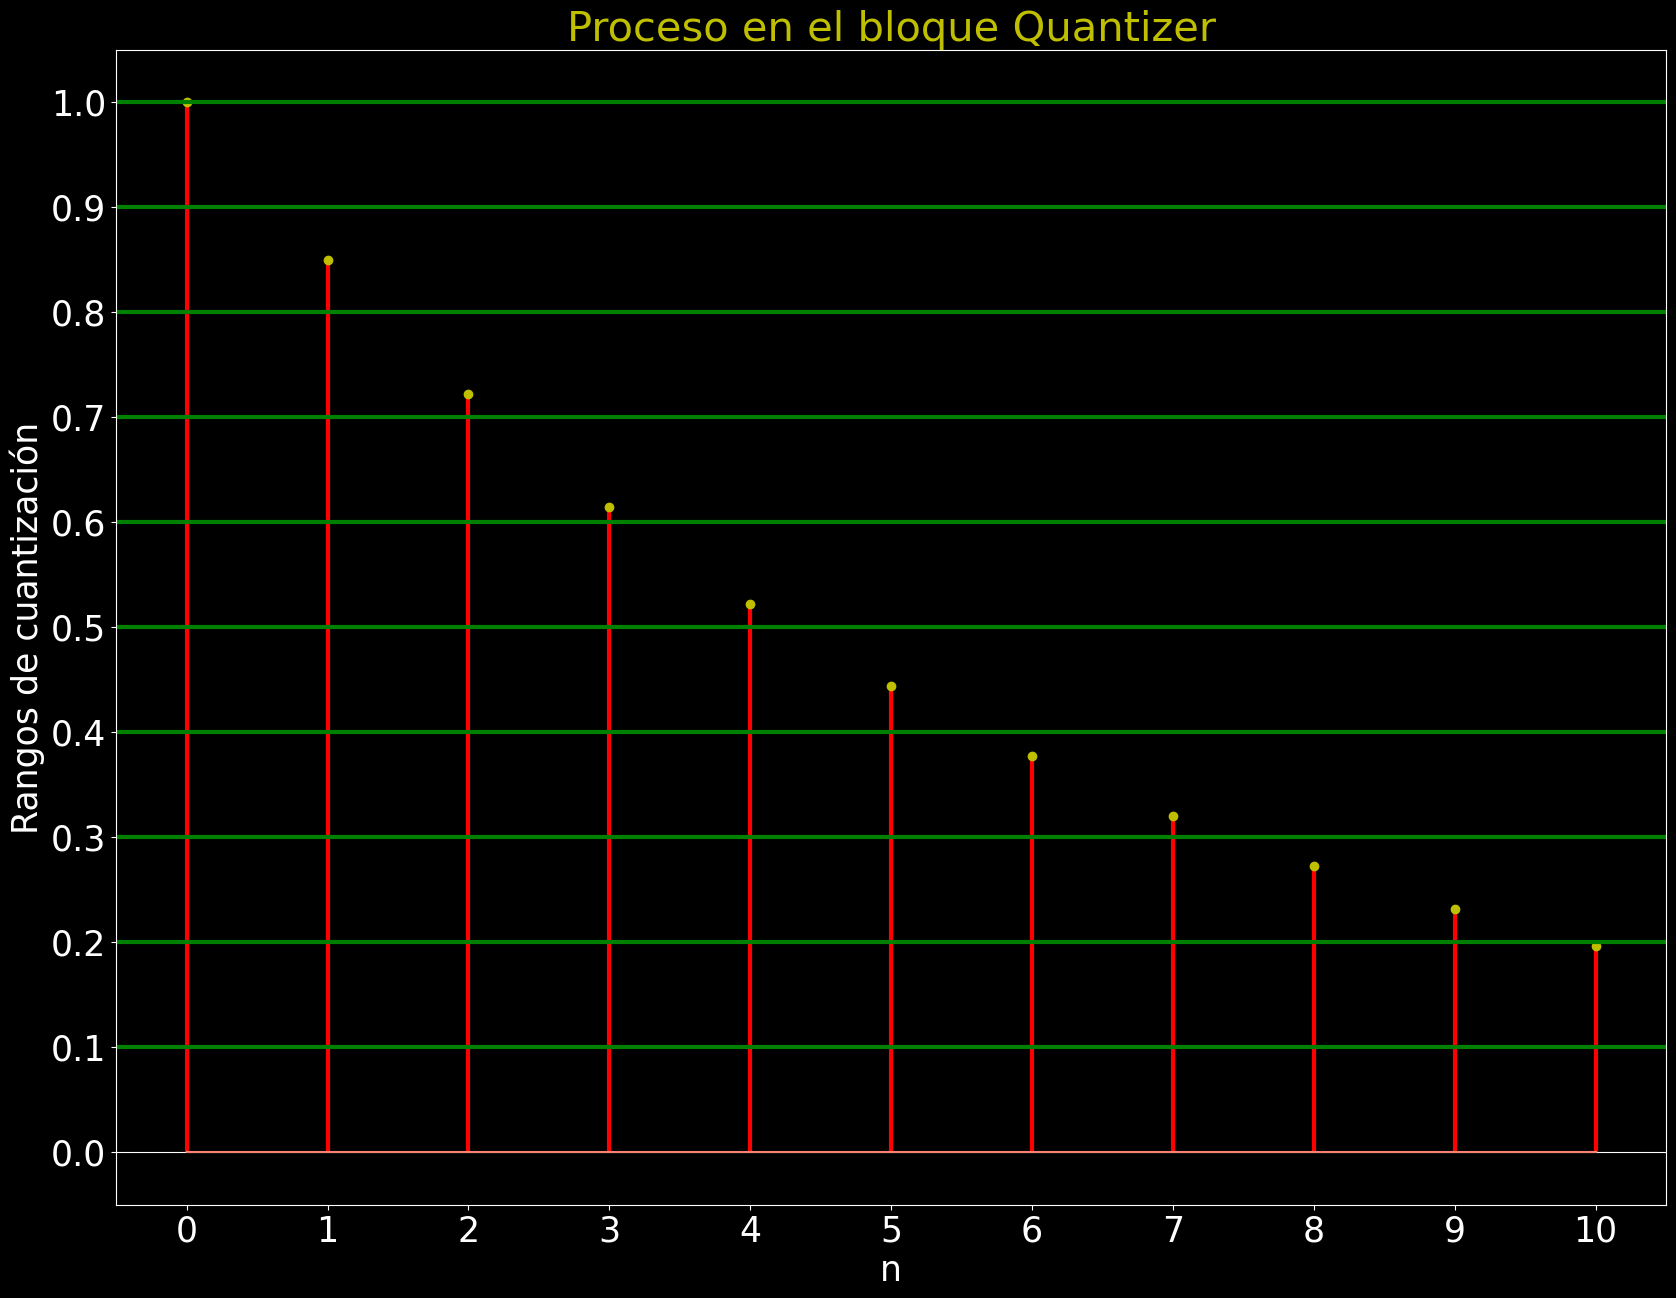

In [19]:
plt.figure(figsize = (20,15))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
n = t
markerline, stemlines, baseline = plt.stem(n,x)
plt.setp(markerline, color="y") 
plt.setp(stemlines, 'linewidth', 3, color="r")
plt.xlabel('n' , fontsize = 25)
plt.ylabel('Rangos de cuantización', fontsize = 25)
plt.xticks([0, 1 , 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks([0.0, 0.1 , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid(True,axis="y")
plt.title('Proceso en el bloque Quantizer', fontsize = 30, color="y")
plt.axhline(y = 0.1, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 0.2, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 0.3, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 0.4, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 0.5, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 0.6, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 0.7, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 0.8, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 0.9, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 1.0, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.show()

### Así observamos los rangos de cuantización de $x(n)$, $\forall n$ entera $\in [0,10]$ tal que $k_1<x(n)<k_2$.

### Ahora sí vamos a presentar la señal cuantizada, lo que tenemos que hacer es cuantizar los muchos dígitos decimales que pueda tener una dada $x(n)$, por lo que vamos a tomar un comando para redondear esta magnitud.

In [21]:
x

array([1.        , 0.85      , 0.7225    , 0.614125  , 0.52200625,
       0.44370531, 0.37714952, 0.32057709, 0.27249053, 0.23161695,
       0.1968744 ])

### Redondearemos los valores a un decimal, pues en este caso la cuantización corresponde a asignar un decimal a cada valor de nuestro arreglo x, un decimal que como podemos ver puede ser 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3 o 0.2

### Es decir, vamos a realizar la cuantización bajo la regla $x(n) \rightarrow x_i(n)$.

In [24]:
x_i=np.around(x,decimals=1)
x_i

array([1. , 0.8, 0.7, 0.6, 0.5, 0.4, 0.4, 0.3, 0.3, 0.2, 0.2])

In [32]:
print(x[0],x[1],x[2])
print(x_i[0],x_i[1],x_i[2]) #Cuando n=0,1,2 para la descripción discreta y para la cuantizada de la señal.

1.0 0.85 0.7224999999999999
1.0 0.8 0.7


### Habiendo realizado la cuantización de magnitudes, procedemos a visualizarla:

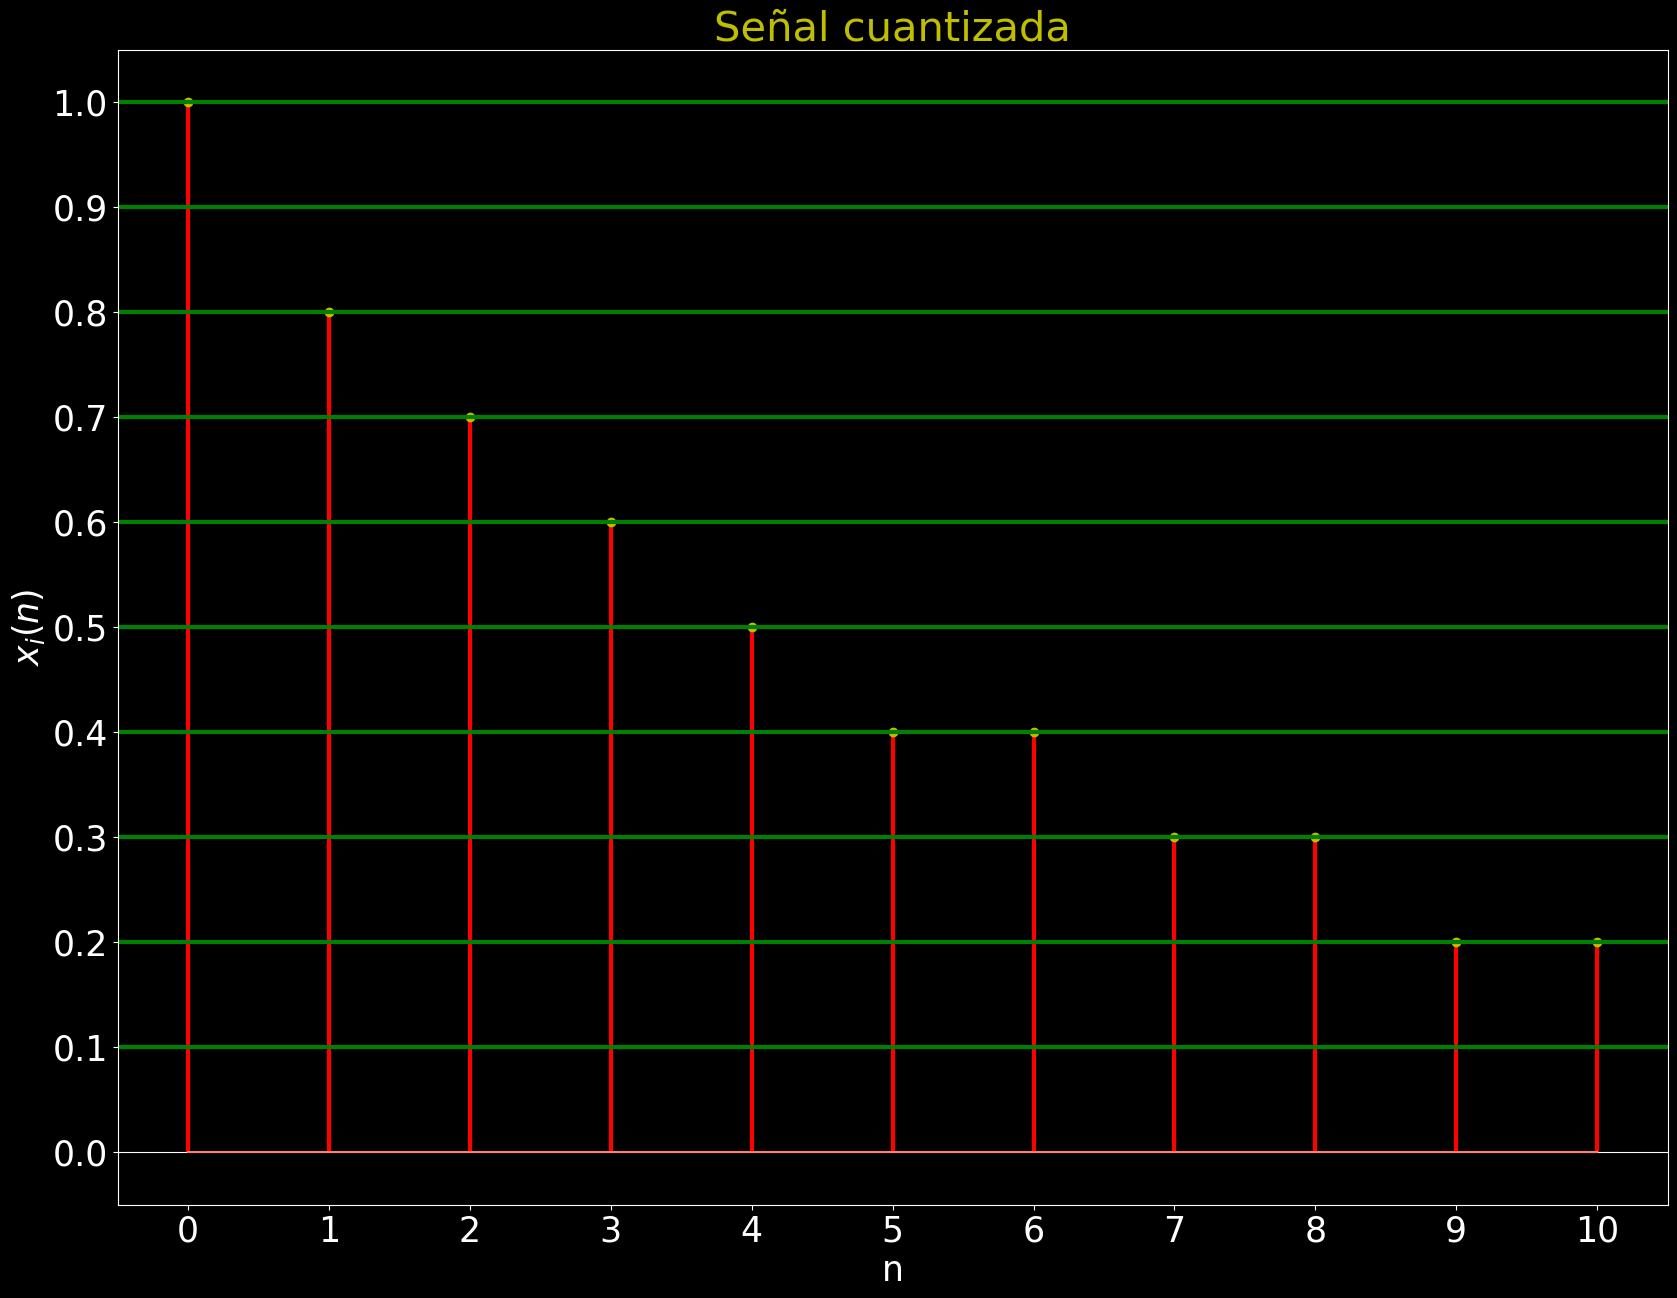

In [37]:
plt.figure(figsize = (20,15))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
n = t
markerline, stemlines, baseline = plt.stem(n,x_i)
plt.setp(markerline, color="y") 
plt.setp(stemlines, 'linewidth', 3, color="r")
plt.xlabel('n' , fontsize = 25)
plt.ylabel(r'$x_i (n)$', fontsize = 25)
plt.xticks([0, 1 , 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks([0.0, 0.1 , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid(True,axis="y")
plt.title('Señal cuantizada', fontsize = 30, color="y")
plt.axhline(y = 0.1, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 0.2, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 0.3, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 0.4, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 0.5, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 0.6, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 0.7, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 0.8, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 0.9, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.axhline(y = 1.0, xmin = 0, xmax = 10, color = 'g', linewidth = 3)
plt.show()